<a href="https://colab.research.google.com/github/alphoenixbiz/Machine-Learning-Using-Python/blob/master/Logistic%20Regression/Example%201/Logistic_Regression_example1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
from google.colab import drive 
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
!wget https://raw.githubusercontent.com/alphoenixbiz/Machine-Learning-Using-Python/master/Logistic%20Regression/Example%201/HR_comma_sep.csv -P "gdrive/My Drive/Colab Notebooks/"

In [5]:
df = pd.read_csv("gdrive/My Drive/Colab Notebooks/HR_comma_sep.csv")
df.tail()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low
14998,0.37,0.52,2,158,3,0,1,0,support,low


In [0]:
X = df.drop('left',axis =1)
y = df['left']



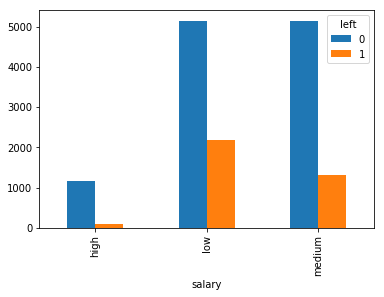

In [23]:

pd.crosstab(X.salary,y).plot(kind='bar')

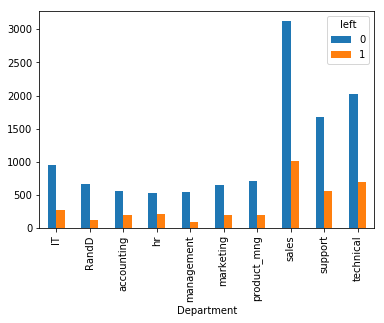

In [28]:
pd.crosstab(df.Department,y).plot(kind='bar')

In [33]:
X = df[['satisfaction_level','average_montly_hours','promotion_last_5years', 'salary']]
X.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary
0,0.38,157,0,low
1,0.80,262,0,medium
2,0.11,272,0,medium
3,0.72,223,0,low
4,0.37,159,0,low


In [34]:
X = pd.get_dummies(X,columns=['salary'],sparse=True)
X.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_high,salary_low,salary_medium
0,0.38,157,0,0,1,0
1,0.80,262,0,0,0,1
2,0.11,272,0,0,0,1
3,0.72,223,0,0,1,0
4,0.37,159,0,0,1,0


In [0]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [0]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='lbfgs', n_jobs=5)

In [0]:
model.fit(X_train,y_train)

In [59]:
model.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0])

In [60]:
#accuracy
model.score(X_test,y_test)

0.7726666666666666

In [0]:
from sklearn.model_selection import cross_val_score

In [62]:
#5-fold cross validation
cv_results = cross_val_score(model, X, y, cv=5)
cv_results

array([0.76574475, 0.78566667, 0.78133333, 0.76792264, 0.7795932 ])

In [63]:
#increased accuracy
np.mean(cv_results)

0.7760521180724576